<a href="https://colab.research.google.com/github/sclaudiobr/geocloud/blob/main/GeoBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOBR e PYPLOT.PLT
O GeoBR é um pacote computacional para download de conjuntos de dados espaciais oficiais do Brasil. O pacote inclui uma ampla gama de dados geoespaciais em formato de geopackage (tal como os shapefiles), disponíveis em várias escalas geográficas e por vários anos com atributos harmonizados, projeção e topologia (ver lista detalhada de conjuntos de dados disponíveis neste [link](https://github.com/ipeaGIT/geobr).<p>
Neste tutorial vamos aprender baixar e filtrar os dados por municípios e gerar o nosso primeiro mapa.

1.   Instalar a biblioteca Geobr
2.   Explorar os dados disponíveis
3.   Filtrar região de interesse
4.   Gerar uma figura


In [ ]:
# Instalação da biblioteca
!pip install geobr

In [3]:
# Importação da biblioteca
import geobr as gbr

In [ ]:
# listagem dos dados disponíveis na base GeoBR
gbr.list_geobr()

In [9]:
# filtragem dos dados de interesse
regiao = gbr.read_region()

In [10]:
# consulta ao formato dos dados
regiao.shape

(5, 3)

In [11]:
# consulta as colunas de dados
regiao.columns

Index(['code_region', 'name_region', 'geometry'], dtype='object')

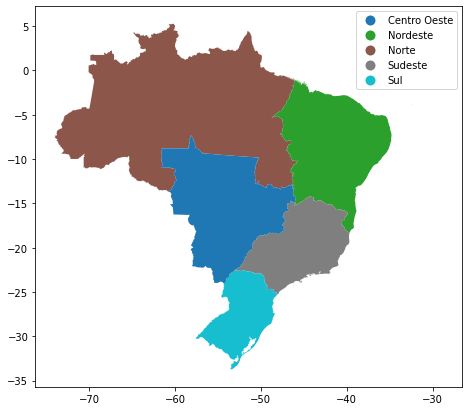

In [12]:
# plotagem do mapa
regiao.plot(column='name_region',figsize=(12,7), legend='true')